In [10]:
#对数据进行基本探索
import pandas as pd

datafile = r'E:\BaiduNetdiskDownload\chapter7\demo\data\air_data.csv'
resultfile = r'E:\BaiduNetdiskDownload\chapter7\demo\tmp\explore.xls'

airdata = pd.read_csv(datafile, encoding = 'utf-8')
#airdata.describe()
explore = airdata.describe(percentiles = [], include = 'all').T#包括对数据的基本描述，percentiles参数是指定计算多少的分位数表（如1/4分位数、中位数等）；T是转置，转置后更方便查阅
explore['null'] = len(airdata)-explore['count'] #describe()函数自动计算非空值数，需要手动计算空值数
explore=explore[['null','max','min']]
explore.columns=[u'空值数',u'最大值',u'最小值']#表头重命名
explore
#explore.to_excel(resultfile) #导出结果

,空值数,最大值,最小值
MEMBER_NO,0,62988,1
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0,6,4
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3248,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420,110,6
LOAD_TIME,0,NaN,NaN


In [27]:
#数据清洗
import pandas as pd

datafile = r'E:\BaiduNetdiskDownload\chapter7\demo\data\air_data.csv'
cleanfile = r'E:\BaiduNetdiskDownload\chapter7\demo\tmp\data_clean.xls'

airdata=pd.read_csv(datafile,encoding='utf-8')
airdata=airdata[airdata['SUM_YR_1'].notnull()*airdata['SUM_YR_2'].notnull()] #票价非空才保留

#保留票价非零或平均折扣率与总飞行公里数同时为0的记录
index1=airdata['SUM_YR_1'] != 0
index2=airdata['SUM_YR_2'] != 0
index3=(airdata['SEG_KM_SUM'] == 0) & (airdata['avg_discount'] == 0)
airdata=airdata[index1|index2|index3]
#airdata.to_excel(cleanfile) #导出结果     
airdata

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
5,56972,2008/02/10,2009/09/29,男,6,广州,广东,CN,64.0,2014/03/31,...,2460,29783,29783,343121,152538,0.456522,0.543478,0.608233,0.391764,15
6,44924,2006/03/22,2006/03/29,男,6,乌鲁木齐市,新疆,CN,46.0,2014/03/31,...,12320,50009,50009,298873,175673,0.504950,0.495050,0.495048,0.504948,29
7,22631,2010/04/09,2010/04/09,女,6,温州市,浙江,CN,50.0,2014/03/31,...,9500,49334,49334,351198,193601,0.589041,0.410959,0.522078,0.477919,14
8,32197,2011/06/07,2011/07/01,男,5,DRANCY,NaN,FR,50.0,2014/03/31,...,500,32200,32200,295158,168028,0.410714,0.589286,0.483459,0.516537,7
9,31645,2010/07/05,2010/07/05,女,6,温州,浙江,CN,43.0,2014/03/31,...,0,47052,47052,251907,143958,0.390625,0.609375,0.526951,0.473044,16


In [44]:
#选取特征
import numpy as np
import pandas as pd

datafile = r'E:\BaiduNetdiskDownload\chapter7\demo\data\air_data.csv'
airdata=pd.read_csv(datafile,encoding='utf-8')
#airdata
test_data=airdata[['FFP_DATE','LOAD_TIME','FLIGHT_COUNT','avg_discount','SEG_KM_SUM','LAST_TO_END']]
#test_data
d_ffp = pd.to_datetime(airdata['FFP_DATE'])
d_load = pd.to_datetime(airdata['LOAD_TIME'])
res = d_load - d_ffp
data2=test_data.copy()
data2['L'] = res.map(lambda x: x / np.timedelta64(30 * 24 * 60, 'm'))
data2['R'] = test_data['LAST_TO_END']
data2['F'] = test_data['FLIGHT_COUNT']
data2['M'] = test_data['SEG_KM_SUM']
data2['C'] = test_data['avg_discount']
data3 = data2[['L', 'R', 'F', 'M', 'C']]
#data3.to_excel(r'E:\BaiduNetdiskDownload\chapter7\demo\data\zscoredata1.xls')
data3

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658
5,74.700000,79,92,294585,0.967692
6,97.700000,1,101,287042,0.965347
7,48.400000,3,73,287230,0.962070
8,34.266667,6,56,321489,0.828478
9,45.500000,15,64,375074,0.708010


In [41]:
data3.describe()

,L,R,F,M,C
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,49.500028,176.120102,11.839414,17123.878691,0.721558
std,28.240765,183.822223,14.049471,20960.844623,0.185427
min,12.166667,1.000000,2.000000,368.000000,0.000000
25%,24.400000,29.000000,3.000000,4747.000000,0.611997
50%,42.333333,108.000000,7.000000,9994.000000,0.711856
75%,72.633333,268.000000,15.000000,21271.250000,0.809476
max,114.566667,731.000000,213.000000,580717.000000,1.500000


In [63]:
#标准差标准化
import pandas as pd

zscoredfile = r'E:\BaiduNetdiskDownload\chapter7\demo\tmp\zscoredata2.xls' #标准差化后的数据存储路径文件；

#标准化处理
# data=pd.read_excel(datafile)
def zscore(data):
    data=(data - data.mean(axis = 0))/(data.std(axis = 0))
    data.columns=['Z'+ i for i in data.columns] #表头加上Z
    return data
data4=zscore(data3)
data4
#data4.to_excel(zscoredfile)

,ZL,ZR,ZF,ZM,ZC
0,1.441178,-0.952660,14.104488,26.887901,1.294751
1,1.312523,-0.920020,9.122093,13.193844,2.862354
2,1.333768,-0.898260,8.766208,12.718386,2.875087
3,0.663343,-0.430416,0.794378,12.605032,1.991687
4,0.390687,-0.930900,9.976218,13.969099,1.343389
5,0.892326,-0.528337,5.705595,13.237116,1.327397
6,1.706752,-0.952660,6.346188,12.877254,1.314745
7,-0.038952,-0.941780,4.353231,12.886223,1.297076
8,-0.539410,-0.925460,3.143221,14.520652,0.576619
9,-0.141640,-0.876500,3.712637,17.077085,-0.073062


In [81]:
import pandas as pd
from sklearn.cluster import KMeans

k=5
data5=pd.read_excel(r'E:/BaiduNetdiskDownload\chapter7(1)/chapter7/demo/tmp/zscoreddata.xls')

#调用k-means进行聚类分析
kmodel=KMeans(n_clusters=k, n_jobs=4) #n_jobs是并行数，一般等于cpu数比较好
kmodel.fit(data5)#训练模型

r1 = pd.Series(kmodel.labels_).value_counts()
r2 = pd.DataFrame(kmodel.cluster_centers_)
r = pd.concat([r2, r1], axis=1)
r.columns = list(data5.columns) + ['类别数目']
# print(r)
# r.to_excel(classoutfile,index=False)
r = pd.concat([data5, pd.Series(kmodel.labels_, index=data5.index)], axis=1)
r.columns = list(data5.columns) + ['聚类类别']
print(kmodel.cluster_centers_)
print(kmodel.labels_)
r
# kmodel.cluster_centers_ #查看聚类中心
# kmodel.labels_ #查看个样本对应的类别

[[-0.70071513 -0.41516827 -0.1607314  -0.16048088 -0.25660178]
 [ 0.05185269 -0.00316184 -0.23075988 -0.23494443  2.17761035]
 [ 0.48347647 -0.79941777  2.48236495  2.42356419  0.30943042]
 [-0.31412102  1.68662184 -0.57386183 -0.53662079 -0.17228032]
 [ 1.16050385 -0.37735949 -0.08704832 -0.09503445 -0.158524  ]]
[4 4 4 ... 4 4 4]


,ZL,ZR,ZF,ZM,ZC,聚类类别
0,1.689882,0.140299,-0.635788,0.068794,-0.337186,4
1,1.689882,-0.322442,0.852453,0.843848,-0.553613,4
2,1.681743,-0.487707,-0.210576,0.158569,-1.094680,4
3,1.534185,-0.785184,0.002030,0.273091,-1.148787,4
4,0.890167,-0.426559,-0.635788,-0.685170,1.231909,1
5,-0.232618,-0.690983,-0.635788,-0.603898,-0.391293,0
6,-0.496949,1.996225,-0.706656,-0.661752,-1.311107,3
7,-0.868498,-0.267905,-0.281445,-0.262422,3.396178,1
8,-1.074796,0.024614,-0.423182,-0.520916,0.149775,0
9,1.907150,-0.884343,2.978512,2.130285,0.366201,2


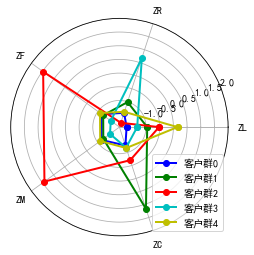

In [82]:
#画出特征雷达图
import numpy as np
import matplotlib.pyplot as plt
 
labels = data.columns   #标签
k = 5     #数据个数
plot_data = kmodel.cluster_centers_ 
color = ['b', 'g', 'r', 'c', 'y'] #指定颜色
 
angles = np.linspace(0, 2*np.pi, k, endpoint=False) 
#np.linspace函数：生成一个等差数列，用来当做角度,endpoint=False不包含终值2pi
#这个角度应该是五角星图五个轴的角度分布
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) # 闭合
#np.concatenate函数: 将两个array数组进行拼接,axis=1说明是跨列 水平方向的拼接
angles = np.concatenate((angles, [angles[0]])) # 闭合
#array([0. , 1.25663706 , 2.51327412 , 3.76991118 , 5.02654825 , 0.])
fig = plt.figure() #生成一块绘图布
ax = fig.add_subplot(111, polar=True) #polar参数  雷达图极坐标
for i in range(len(plot_data)):
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = u'客户群'+str(i), linewidth=2)# 画线，每行没一个客户群

ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5), fontproperties="SimHei") #设置网格的坐标
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei") #设置网格的角度
plt.legend(loc = 4)
plt.show()
#根据图中结果可分析各个客户群特征，从而将客户分为五个类别，对各个类别采取不同的营销手段。

In [ ]:
# 针对聚类结果进行特征分析，如下图所示，其中：
# 客户群2：在F、M属性上最大，在R属性上最小。
# 客户群4：在L属性上最大。
# 客户群3：在R属性上最大，在F、M属性上最小。
# 客户群0：在L、C属性上最小。
# 客户群1：在C属性上最大。
根据业务对不同的客户群采取不同的营销手段，可使得利益最大化！